## Loan Approval Classification Project

### Introduction
Access to credit is essential for economic growth, but lending institutions must carefully manage the risk of borrower default. Traditional loan approval methods often rely on manual reviews and fixed rules, which can be inefficient and fail to capture complex customer risk patterns.
This project applies a machine learning classification approach to predict loan approval outcomes using historical applicant data. By analyzing financial, credit, employment, and loan-related features, the model aims to support faster, more consistent, and data-driven lending decisions while minimizing default risk.

### Business Problem
Loan approval decisions directly impact a financial institution’s profitability and risk exposure. Approving applicants who are likely to default leads to financial losses, while rejecting creditworthy applicants results in missed revenue opportunities and reduced customer satisfaction. As loan application volumes increase, relying on manual reviews and rigid rule-based systems becomes inefficient and inconsistent.
The business problem is to accurately classify loan applicants as low-risk or high-risk using historical application data, enabling the institution to make faster, consistent, and data-driven approval decisions. An effective solution should reduce default risk while supporting sustainable business growth.

### Project Objective
The primary objective of this project is to build and evaluate a machine learning classification model that predicts loan approval outcomes based on applicant financial, credit, employment, and loan-related information. The model aims to accurately distinguish between low-risk and high-risk applicants to support data-driven lending decisions. Specifically, the project seeks to:
  - Reduce the likelihood of approving high-risk applicants who may default
  - Improve consistency and efficiency in loan approval decisions
  - Provide actionable insights to credit risk teams through interpretable model outputs
  - Support business growth by balancing risk management with fair access to credit

### Dataset Description and Overview
The dataset used in this project contains historical loan application records collected from a financial institution. Each observation represents a single loan applicant and includes demographic, financial, credit history, employment, and loan-specific attributes that are relevant to assessing credit risk.
Key categories of variables in the dataset include:
  - Applicant financial information such as annual income, existing debt, debt-to-income ratio, and savings assets
  - Credit history indicators including credit score, length of credit history,previous defaults, and recent delinquencies
  - Employment and stability factors such as occupation status and years employed
  - Loan characteristics including loan amount, interest rate, loan purpose, and product type.
  
The target variable, loan_status, indicates whether a loan application was approved or rejected, making this a binary classification problem. The dataset provides a realistic foundation for building and evaluating machine learning models aimed at supporting data-driven loan approval and credit risk assessment decisions.  

Importing the appropriate libraries for EDA Workflow

In [31]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('loan_approval_data_2025.csv')
data.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [36]:
data.describe()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,11.118603,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,18.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,9.00000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


In [37]:
# Check missing values
missing_values = data.isnull().sum()
missing_values

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

This EDA workflow gives you visuals, statistics, and insights that will directly guide feature selection, preprocessing, and modeling.

### Target Distribution: Loan Status
Shows the number of approved (1) and rejected (0) loan applications. This helps identify class balance, which is important for building a classification model.

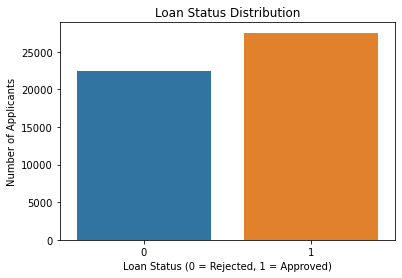

In [38]:
# Target distribution
sns.countplot(x='loan_status', data=data)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Number of Applicants")
plt.show()

### Occupation Status vs Loan Status
Compares loan approvals and rejections across different occupation types (Employed, Student, etc.). It helps determine whether employment type affects loan approval likelihood

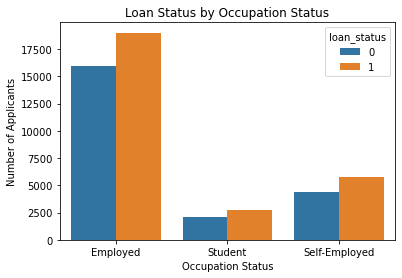

In [39]:
# Occupation Status vs Loan Status
sns.countplot(x='occupation_status', hue='loan_status', data=data)
plt.title("Loan Status by Occupation Status")
plt.xlabel("Occupation Status")
plt.ylabel("Number of Applicants")
plt.show()

### Loan Intent vs Loan Status
Shows the distribution of loan approvals by purpose (e.g., Business, Home Improvement). This reveals if certain loan purposes are more likely to be approved or rejected.

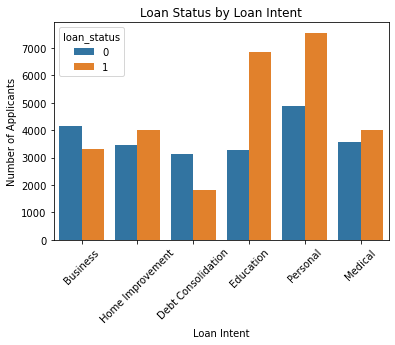

In [40]:
# Loan Intent vs Loan Status
sns.countplot(x='loan_intent', hue='loan_status', data=data)
plt.title("Loan Status by Loan Intent")
plt.xticks(rotation=45)
plt.xlabel("Loan Intent")
plt.ylabel("Number of Applicants")
plt.show()

### Product Type vs Loan Status
Compares loan approvals across different loan products (Credit Card, Personal Loan). Useful for understanding if loan product type influences approval rates

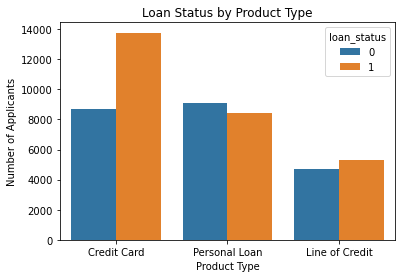

In [41]:
# Product Type vs Loan Status
sns.countplot(x='product_type', hue='loan_status', data=data)
plt.title("Loan Status by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Number of Applicants")
plt.show()

### Financial Profile Analysis

### Annual Income vs Loan Status
Boxplot comparing annual income of approved and rejected applicants. Highlights whether higher-income applicants have a higher probability of loan approval.

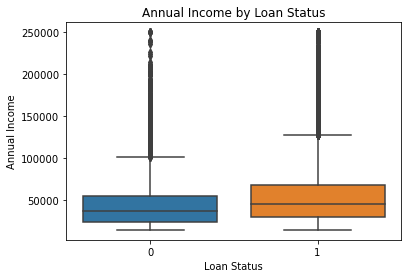

In [42]:
# Annual Income
sns.boxplot(x='loan_status', y='annual_income', data=data)
plt.title("Annual Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()

### Debt-to-Income Ratio vs Loan Status
Shows the relationship between debt-to-income ratio and loan approval. Higher ratios may indicate greater risk and lower chances of approval

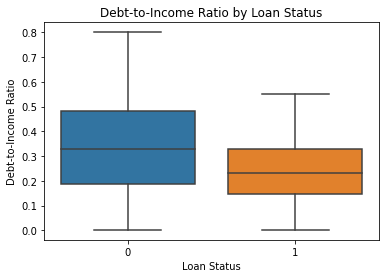

In [43]:
# Debt-to-Income Ratio
sns.boxplot(x='loan_status', y='debt_to_income_ratio', data=data)
plt.title("Debt-to-Income Ratio by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Debt-to-Income Ratio")
plt.show()

### Loan-to-Income Ratio vs Loan Status
Compares the loan amount relative to income for approved and rejected applicants. Helps assess whether large loans relative to income reduce approval probability

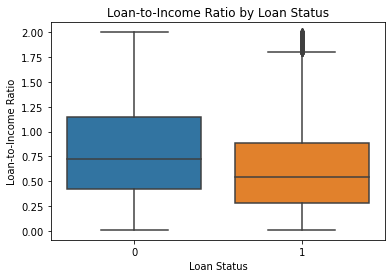

In [44]:
# Loan-to-Income Ratio
sns.boxplot(x='loan_status', y='loan_to_income_ratio', data=data)
plt.title("Loan-to-Income Ratio by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan-to-Income Ratio")
plt.show()

### Credit History Analysis

### Credit Score vs Loan Status
Boxplot comparing credit scores of approved and rejected applicants. Reveals if credit score is a strong factor in loan approval decisions

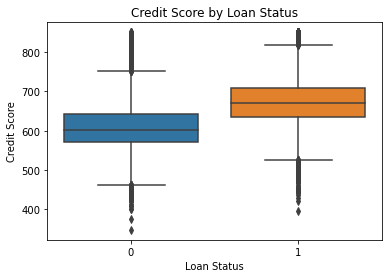

In [46]:
# Credit Score
sns.boxplot(x='loan_status', y='credit_score', data=data)
plt.title("Credit Score by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.show()

### Defaults on File vs Loan Status
Shows how past defaults impact loan approval. Applicants with previous defaults are more likely to be rejected

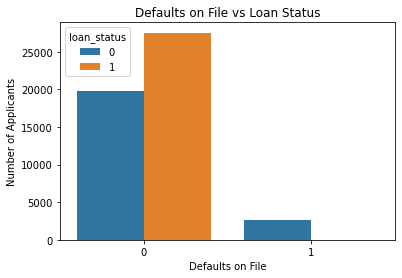

In [47]:
# Defaults on File
sns.countplot(x='defaults_on_file', hue='loan_status', data=data)
plt.title("Defaults on File vs Loan Status")
plt.xlabel("Defaults on File")
plt.ylabel("Number of Applicants")
plt.show()

### Loan Characteristics Analysis

### Loan Amount vs Loan Status
Compares the size of requested loans for approved and rejected applicants. Larger loans may carry higher risk and lower approval likelihood

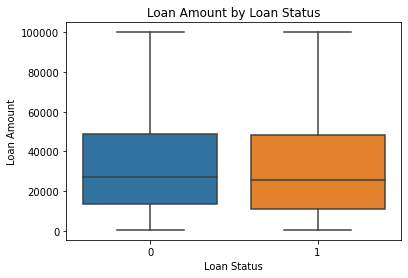

In [48]:
# Loan Amount
sns.boxplot(x='loan_status', y='loan_amount', data=data)
plt.title("Loan Amount by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()


### Interest Rate vs Loan Status
Shows interest rates for approved and rejected loans. Helps assess if higher interest rates are associated with rejection or approval patterns.

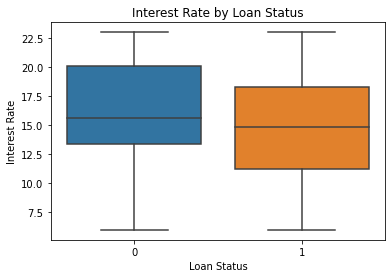

In [49]:
# Interest Rate
sns.boxplot(x='loan_status', y='interest_rate', data=data)
plt.title("Interest Rate by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()

### Correlation Matrix

### Correlation Matrix (Numeric Features)
Displays pairwise correlations between numeric features. Useful for identifying strongly related variables and potential predictors of loan approval

In [50]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=np.number)
# Compute correlation
corr = numeric_data.corr()

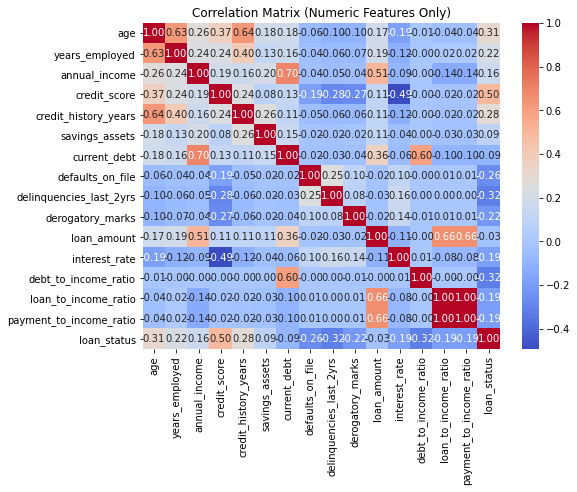

In [51]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

### Data Preprocessing & Feature Engineering
Before building machine learning models, the dataset must be cleaned and transformed into a format suitable for modeling. This step ensures consistency, reduces noise, and improves model performance.


### Removing Non-Predictive Features
The `customer_id` column is a unique identifier and does not provide predictive value for loan approval decisions. It is removed to prevent noise in the model.


In [52]:
data.drop(columns=['customer_id'], inplace=True)


### Handling Missing Values
Missing values can negatively impact model training.  
- Numeric features are filled using the **median** (robust to outliers).
- Categorical features are filled with **"Unknown"**.


In [53]:
import numpy as np

# Numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = data[col].fillna("Unknown")


### Encoding Categorical Variables
Machine learning algorithms require numeric input.  
Categorical features such as occupation status, loan intent, and product type are encoded using **One-Hot Encoding**.


In [54]:
data = pd.get_dummies(
    data,
    columns=['occupation_status', 'loan_intent', 'product_type'],
    drop_first=True
)


### Feature Scaling
Some algorithms are sensitive to feature scale.  
Numerical features are standardized using **StandardScaler** so that all features have similar ranges.


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = [
    'age',
    'years_employed',
    'annual_income',
    'credit_score',
    'credit_history_years',
    'savings_assets',
    'current_debt',
    'loan_amount',
    'interest_rate',
    'debt_to_income_ratio',
    'loan_to_income_ratio',
    'payment_to_income_ratio'
]

data[numeric_features] = scaler.fit_transform(data[numeric_features])


### Feature and Target Definition
The target variable is `loan_status`, which indicates whether a loan was approved (`1`) or rejected (`0`).  
All remaining variables are used as features.


In [57]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']


### Train-Test Split
The dataset is split into training and testing sets to evaluate model performance on unseen data.  
Stratification is applied to preserve class balance.


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (40000, 24)
Testing set shape: (10000, 24)


### Baseline Model Training and Evaluation
Baseline models provide a reference point for evaluating more complex machine learning models.  
They help answer the question: *“Is our model actually learning useful patterns?”*


### Logistic Regression (Baseline Model)
Logistic Regression is a simple and interpretable classification algorithm.  
It serves as a strong baseline for binary classification problems.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print("ROC-AUC Score:", roc_auc_lr)


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4495
           1       0.87      0.89      0.88      5505

    accuracy                           0.87     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000

ROC-AUC Score: 0.9446009543351731


In [26]:
# Baseline Model 2: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

# Train model
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Evaluation
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print("ROC-AUC Score:", roc_auc_dt)


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4495
           1       0.84      0.90      0.87      5505

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

ROC-AUC Score: 0.9110474752954894


In [27]:
baseline_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "ROC-AUC": [roc_auc_lr, roc_auc_dt]
})

baseline_results


,Model,ROC-AUC
0,Logistic Regression,0.944601
1,Decision Tree,0.911047


### Baseline Model Performance Comparison
The table above summarizes the performance of baseline models using ROC-AUC.


### Summary of Baseline Models

  - Logistic Regression provides a strong, interpretable baseline
  - Decision Tree captures non-linear relationships but may overfit
  - ROC-AUC is used as the primary comparison metric
  - These results establish a benchmark for more advanced models


### Advanced Models and Optimization

After establishing baseline performance, more advanced models are trained to capture complex, non-linear relationships in the data. These models are typically more powerful and better suited for real-world credit risk prediction.


In [28]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score:", roc_auc_rf)


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4495
           1       0.92      0.93      0.92      5505

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

ROC-AUC Score: 0.9735542670784674


In [29]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Train model
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb))

roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print("ROC-AUC Score:", roc_auc_gb)


Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4495
           1       0.90      0.94      0.92      5505

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

ROC-AUC Score: 0.9763016733700478


In [30]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_features.plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


NameError: name 'best_rf' is not defined

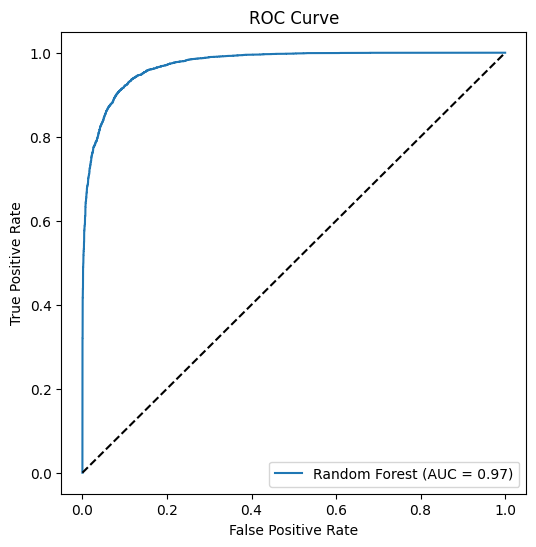

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--') # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


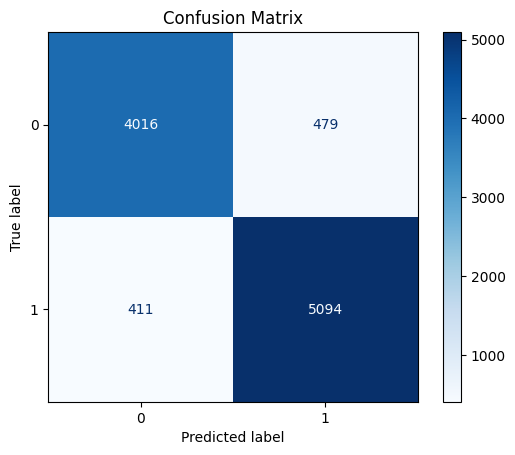

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Model Performance Comparison
model_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"
    ],
    "ROC-AUC": [
        roc_auc_lr,
        roc_auc_dt,
        roc_auc_rf,
        roc_auc_gb
    ]
})

model_results.sort_values(by="ROC-AUC", ascending=False)
# All models are compared using ROC-AUC to identify the best-performing classifier.


,Model,ROC-AUC
3,Gradient Boosting,0.976302
2,Random Forest,0.973554
0,Logistic Regression,0.944609
1,Decision Tree,0.911047


In [ ]:
# Hyperparameter Optimization (Grid Search)
# Hyperparameter tuning is applied to the best-performing model to further improve predictive performance using GridSearchCV.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)
print("Best ROC-AUC:", rf_grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC: 0.9728448693956823


In [ ]:
# Final Tuned Model Evaluation
# The optimized model is evaluated on the test set to assess real-world performance.
best_rf = rf_grid.best_estimator_

y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print("Tuned Random Forest Classification Report")
print(classification_report(y_test, y_pred_best))

roc_auc_best = roc_auc_score(y_test, y_prob_best)
print("Final ROC-AUC Score:", roc_auc_best)


Tuned Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4495
           1       0.91      0.93      0.92      5505

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Final ROC-AUC Score: 0.9731897284196085


In [ ]:
# Feature Importance
# Feature importance helps identify which variables contribute most to loan approval decisions, improving model interpretability.
feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


credit_score               0.214741
debt_to_income_ratio       0.174627
interest_rate              0.065100
credit_history_years       0.064081
delinquencies_last_2yrs    0.060792
loan_to_income_ratio       0.045115
age                        0.044681
defaults_on_file           0.043584
payment_to_income_ratio    0.041858
years_employed             0.037787
dtype: float64

### Summary of Advanced Models

- Ensemble models outperform baseline classifiers
- Random Forest and Gradient Boosting capture complex patterns
- Hyperparameter tuning further improves performance
- Feature importance provides interpretability for business insights


### Model Interpretation and Business Recommendations
The final optimized classification model provides valuable insights into the factors influencing loan approval decisions. These insights can be used to support risk management, improve decision consistency, and guide business strategy.
Feature importance analysis reveals the most influential variables used by the model to distinguish between low-risk and high-risk applicants.
The most important predictors of loan approval include:

  - **Credit score** – Applicants with higher credit scores are more likely to be approved
  - **Debt-to-income ratio** – Higher ratios significantly increase rejection likelihood
  - **Loan-to-income ratio** – Large loans relative to income increase credit risk
  - **Annual income** – Higher income improves repayment capacity
  - **Defaults on file & recent delinquencies** – Past credit issues strongly predict rejection
  - **Interest rate and loan amount** – Larger, higher-interest loans carry increased risk


### Business Implications
The model provides a consistent and data-driven approach to loan approval that can enhance both profitability and risk control.
 - Risk Reduction:
High-risk applicants are identified more accurately, reducing default-related losses.
 - Operational Efficiency:
Automated predictions reduce reliance on manual reviews and speed up loan processing.
 - Consistency & Fairness:
Decisions are based on quantifiable risk factors, reducing subjective bias.

 - Scalability:
The model can handle large volumes of loan applications without performance degradation.

### Recommendations for Deployment
Based on model performance and interpretability, the following recommendations are proposed:
 - Integrate the model into the loan approval workflow to assist credit officers rather than fully automate decisions. Borderline cases can be flagged for manual review.
 - Applicants with moderate risk profiles may still be approved with adjusted interest rates or loan limits, maximizing revenue while managing risk.
 - Track performance metrics such as ROC-AUC, precision, and recall over time to detect model drift and maintain reliability.
 - Conduct fairness audits to ensure that model decisions do not unintentionally disadvantage protected groups. Avoid using sensitive attributes in decision-making.
- Periodically retrain the model using new loan performance data to reflect changing economic conditions and borrower behavior.


### Conclusion
This project demonstrates how machine learning can enhance loan approval decisions by improving accuracy, consistency, and risk management. The final optimized classification model successfully identifies key drivers of credit risk and provides actionable insights that support sustainable business growth.
